In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [14]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Depi\Heart_Disease_Project\data\heart_disease_clean.csv")

In [15]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.948726,1,1,0.757525,-0.264900,1,2,0.017197,0,1.087338,3,0.0,6.0,0
1,1.392002,1,4,1.611220,0.760415,0,2,-1.821905,1,0.397182,2,3.0,3.0,2
2,1.392002,1,4,-0.665300,-0.342283,0,2,-0.902354,1,1.346147,2,2.0,7.0,1
3,-1.932564,1,3,-0.096170,0.063974,0,0,1.637359,0,2.122573,3,0.0,3.0,0
4,-1.489288,0,2,-0.096170,-0.825922,0,2,0.980537,0,0.310912,1,0.0,3.0,0


In [16]:
X = df.drop("num", axis=1)
y = df["num"]


In [17]:
rf = RandomForestClassifier(random_state= 42)
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [19]:
F_imp = rf.feature_importances_
feature_names = X.columns

C:\Users\DELL\AppData\Local\Temp\ipykernel_22720\3860055679.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


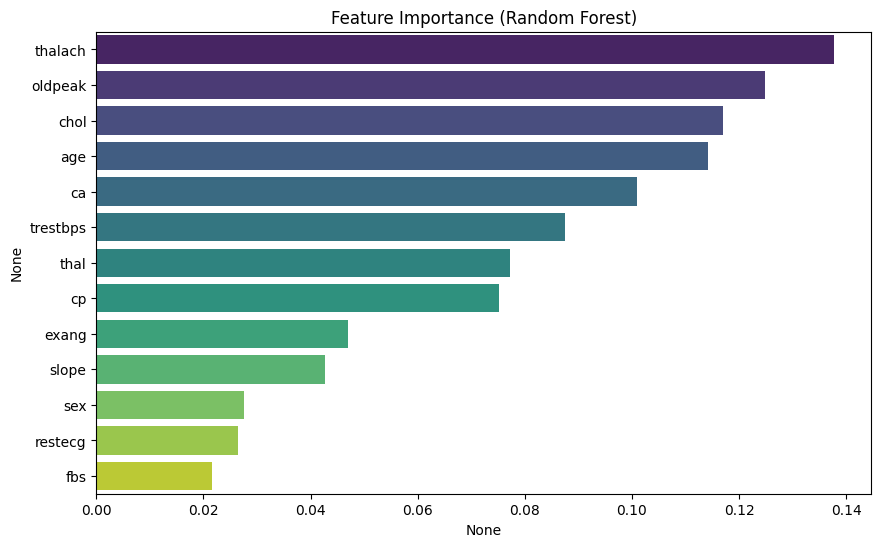

In [21]:
feat_imp = pd.Series(F_imp, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [22]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 100)
rfe = RFE(model, n_features_to_select= 10)
rfe.fit(X,y)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

RFE(estimator=LogisticRegression(), n_features_to_select=10)

In [23]:
selected_feat = X.columns[rfe.support_]
print("Selected features by RFE:", list(selected_feat))

Selected features by RFE: ['sex', 'cp', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [24]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)
chi_scores, p_values = chi2(X_scaled, y)
chi2_results = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_scores, "p-value": p_values})
chi2_results.sort_values("Chi2 Score", ascending=False, inplace=True)

print(chi2_results)

     Feature  Chi2 Score       p-value
12      thal   48.176108  8.672776e-10
8      exang   41.534482  2.083076e-08
11        ca   35.395825  3.852011e-07
9    oldpeak   16.451213  2.469786e-03
10     slope   14.046618  7.147746e-03
2         cp    8.234094  8.336977e-02
1        sex    7.499223  1.117436e-01
6    restecg    7.028775  1.343754e-01
5        fbs    6.658223  1.550901e-01
7    thalach    3.133976  5.356604e-01
0        age    1.244886  8.706545e-01
3   trestbps    0.622014  9.605862e-01
4       chol    0.175931  9.963506e-01


In [25]:
# Final reduced dataset
X_reduced = df[selected_feat]  # from RFE or intersection of methods


In [26]:
X_reduced.to_csv("reduced_features.csv", index=False)
